In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Load data - data overview

In [2]:
df=pd.read_csv('esol_dataset.csv')

In [3]:
df.head()

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O)
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.33,c1ccsc1


In [4]:
df.shape

(1128, 10)

In [5]:
df.columns

Index(['Compound ID', 'ESOL predicted log solubility in mols per litre',
       'Minimum Degree', 'Molecular Weight', 'Number of H-Bond Donors',
       'Number of Rings', 'Number of Rotatable Bonds', 'Polar Surface Area',
       'measured log solubility in mols per litre', 'smiles'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 10 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Compound ID                                      1128 non-null   object 
 1   ESOL predicted log solubility in mols per litre  1128 non-null   float64
 2   Minimum Degree                                   1128 non-null   int64  
 3   Molecular Weight                                 1128 non-null   float64
 4   Number of H-Bond Donors                          1128 non-null   int64  
 5   Number of Rings                                  1128 non-null   int64  
 6   Number of Rotatable Bonds                        1128 non-null   int64  
 7   Polar Surface Area                               1128 non-null   float64
 8   measured log solubility in mols per litre        1128 non-null   float64
 9   smiles                        

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.isnull().sum()

Compound ID                                        0
ESOL predicted log solubility in mols per litre    0
Minimum Degree                                     0
Molecular Weight                                   0
Number of H-Bond Donors                            0
Number of Rings                                    0
Number of Rotatable Bonds                          0
Polar Surface Area                                 0
measured log solubility in mols per litre          0
smiles                                             0
dtype: int64

* The data is fully-written (no entries are missing)
* The data has no duplicate data
* No unexpected data type

# Data Preprocessing

# Extract molecular features from SMILES

In [9]:
df.columns

Index(['Compound ID', 'ESOL predicted log solubility in mols per litre',
       'Minimum Degree', 'Molecular Weight', 'Number of H-Bond Donors',
       'Number of Rings', 'Number of Rotatable Bonds', 'Polar Surface Area',
       'measured log solubility in mols per litre', 'smiles'],
      dtype='object')

In [10]:
from rdkit import Chem
from rdkit.Chem import Descriptors

In [11]:
df=df.rename(columns={'measured log solubility in mols per litre':'LogS'})
def take_feature(smiles):
    mol=Chem.MolFromSmiles(smiles)
    if mol:
        return {'MolWt': Descriptors.MolWt(mol),
               'LogP': Descriptors.MolLogP(mol),
               'TPSA': Descriptors.TPSA(mol),
               'HBD': Descriptors.NumHDonors(mol),
               'HBA': Descriptors.NumHAcceptors(mol),
               }
df_features=df['smiles'].apply(take_feature).apply(pd.Series)

In [12]:
df = pd.concat([df,df_features],axis=1)

# Analyze and visualize the data

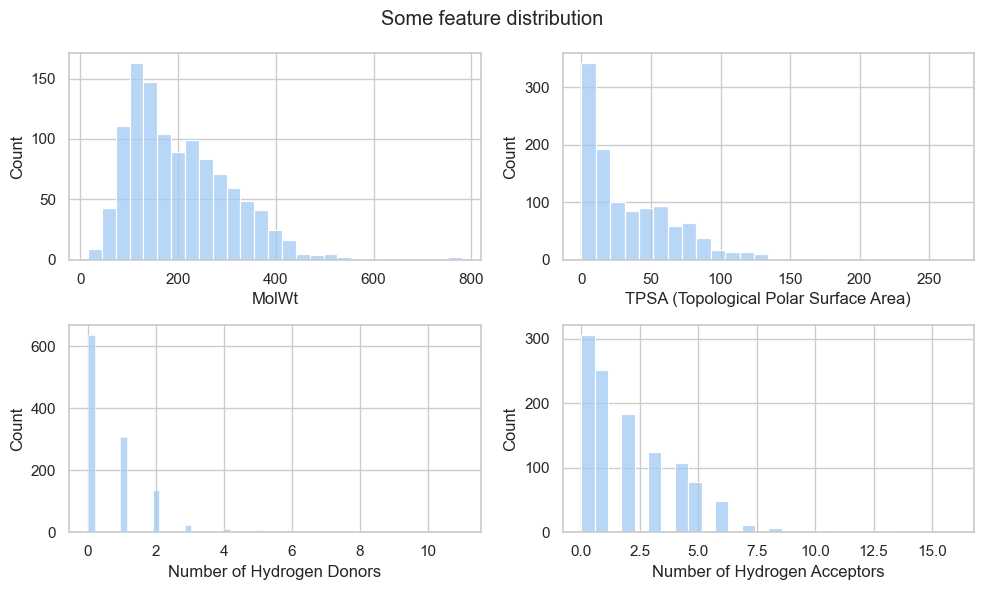

In [13]:
sns.set(style="whitegrid", palette='pastel')
fig,ax=plt.subplots(2,2,figsize=(10,6))
sns.histplot(data=df['MolWt'],ax=ax[0][0]);
sns.histplot(data=df['TPSA'],ax=ax[0][1]);
ax[0][1].set(xlabel='TPSA (Topological Polar Surface Area)');
sns.histplot(data=df['HBD'],ax=ax[1][0]);
ax[1][0].set(xlabel='Number of Hydrogen Donors');
sns.histplot(data=df['HBA'], ax=ax[1][1]);
ax[1][1].set(xlabel='Number of Hydrogen Acceptors');
plt.suptitle('Some feature distribution');
fig.tight_layout()

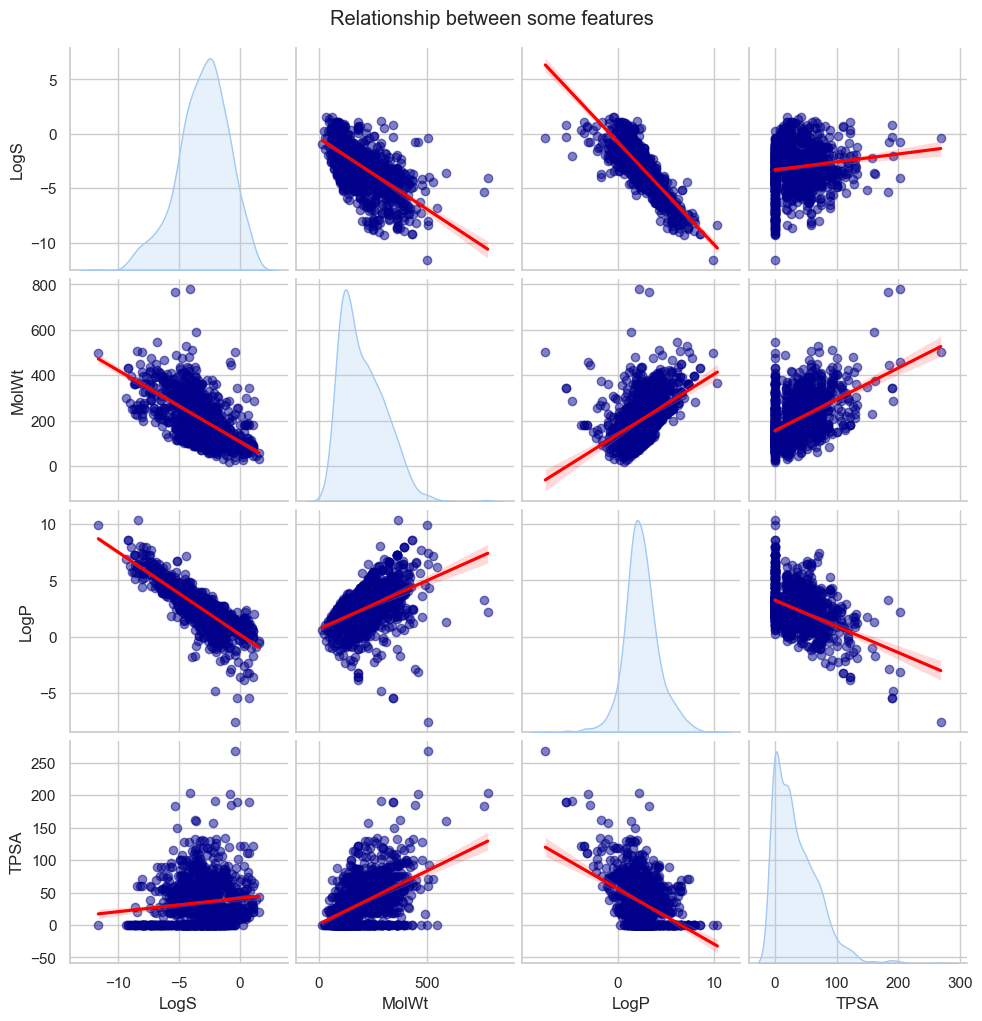

In [14]:
sns.pairplot(data=df, vars=['LogS','MolWt','LogP','TPSA'], diag_kind='kde', kind='reg',
            plot_kws={'scatter_kws': {'color': 'darkblue', 'alpha': 0.5}, 
                       'line_kws': {'color': 'red'}});
plt.suptitle('Relationship between some features', y= 1.02);


In [15]:
df.head()

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,LogS,smiles,MolWt,LogP,TPSA,HBD,HBA
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,457.432,-3.10802,202.32,7.0,12.0
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2,201.225,2.84032,42.24,1.0,2.0
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O),152.237,2.87800,17.07,0.0,1.0
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,278.354,6.29940,0.00,0.0,0.0
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.33,c1ccsc1,84.143,1.74810,0.00,0.0,1.0


In [16]:
correlations=df[['LogS','MolWt','LogP','TPSA','HBD','HBA']].corr(method='pearson')
correlations

,LogS,MolWt,LogP,TPSA,HBD,HBA
LogS,1.000000,-0.640189,-0.827918,0.123210,0.209429,0.055728
MolWt,-0.640189,1.000000,0.477026,0.475440,0.254877,0.555052
LogP,-0.827918,0.477026,1.000000,-0.444554,-0.507564,-0.317370
TPSA,0.123210,0.475440,-0.444554,1.000000,0.755932,0.897250
HBD,0.209429,0.254877,-0.507564,0.755932,1.000000,0.575376
HBA,0.055728,0.555052,-0.317370,0.897250,0.575376,1.000000


Text(0.5, 1.0, 'Relationship between some features')

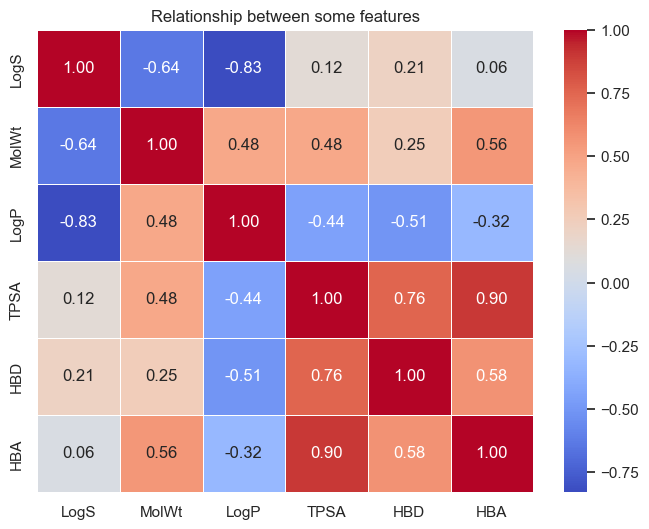

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5);
plt.title('Relationship between some features')

# Exploratory Data Analysis (EDA)
* Analysis of Molecular Features and Their Correlations
## 1. Univariate Analysis (Individual Feature Distributions)
* The majority of molecules have a molecular weight between 100 and 300 g/mol.
* Most compounds have a Topological Polar Surface Area (TPSA) below 20, with a few scattered between 30 and 100.
* The number of hydrogen bond donors (HBD) is mostly 0, with over 600 molecules having no hydrogen bond donors. The highest observed count is 4.
* The number of hydrogen bond acceptors (HBA) is higher compared to HBD, with the most frequent count being 8 acceptors.
## 2. Feature Correlations
* LogP and LogS exhibit the strongest linear relationship, followed by LogS and Molecular Weight (MolWt).
* Smaller LogP or Molecular Weight values correspond to higher LogS values, indicating that more hydrophilic molecules tend to have better solubility.
* HBD, HBA, and TPSA do not show a clear linear correlation with LogS, suggesting their effect on solubility is non-linear or influenced by other factors.
* TPSA and HBA have a very strong linear correlation (r ≈ 0.9), indicating that as TPSA increases, the number of hydrogen bond acceptors also rises.
* TPSA and HBD exhibit a moderate correlation (r ≈ 0.76), suggesting that molecules with a higher polar surface area also tend to have more hydrogen bond donors.

# Molecular Fingerprint Matching

**We'll find which molecule matching the most in fingerprint with the original molecule**

In [18]:
from rdkit.Chem import AllChem
from scipy.spatial.distance import pdist, squareform
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import IPythonConsole

In [61]:
smiles_df=df[['smiles','Compound ID']]
PandasTools.AddMoleculeColumnToFrame(smiles_df, smilesCol='smiles', includeFingerprints=True)

mol_list=list(df['smiles'])
fps=[AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(mol),2,nBits=1024) for mol in mol_list]
fps_array=np.array([list(fp) for fp in fps])
def tanimoto_distance(fp1, fp2):
    return 1-np.sum(np.logical_and(fp1,fp2))/ np.sum(np.logical_or(fp1,fp2))
distances=squareform(pdist(fps_array, metric=tanimoto_distance))
np.fill_diagonal(distances, np.inf)
nearest_neighbors=np.argmin(distances, axis=1)

names=list(df['Compound ID'])
smiles_df['Nearest Molecular Fingerprint Matching']=[names[nearest_neighbors[i]] for i in range(len(names))]
smiles_df['Nearest Smiles Fingerprint Matching']=[mol_list[nearest_neighbors[i]] for i in range(len(mol_list))]

PandasTools.AddMoleculeColumnToFrame(smiles_df,molCol='ROMol Neighbors', smilesCol='Nearest Smiles Fingerprint Matching',includeFingerprints=True)

C:\Users\hieun\AppData\Local\Programs\Python\Python313\Lib\site-packages\rdkit\Chem\PandasTools.py:381: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame[molCol] = frame[smilesCol].map(
[10:08:31] DEPRECATION WARNING: please use MorganGenerator
[10:08:31] DEPRECATION WARNING: please use MorganGenerator
[10:08:31] DEPRECATION WARNING: please use MorganGenerator
[10:08:31] DEPRECATION WARNING: please use MorganGenerator
[10:08:31] DEPRECATION WARNING: please use MorganGenerator
[10:08:31] DEPRECATION WARNING: please use MorganGenerator
[10:08:31] DEPRECATION WARNING: please use MorganGenerator
[10:08:31] DEPRECATION WARNING: please use MorganGenerator
[10:08:31] DEPRECATION WARNING: please use MorganGenerator
[10:08:31] DEPRECATION WARNING: pleas

,smiles,Compound ID,ROMol,Nearest Molecular Fingerprint Matching,Nearest Smiles Fingerprint Matching,ROMol Neighbors
0,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,Amigdalin,,Raffinose,OCC1OC(CO)(OC2OC(COC3OC(CO)C(O)C(O)C3O)C(O)C(O...,
1,Cc1occc1C(=O)Nc2ccccc2,Fenfuram,,salicylanilide,c1ccccc1NC(=O)c2c(O)cccc2,
2,CC(C)=CCCC(C)=CC(=O),citral,,Nerol,CC(C)=CCC/C(C)=C\CO,
3,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,Picene,,Chrysene,c1ccc2c(c1)ccc3c4ccccc4ccc23,
4,c1ccsc1,Thiophene,,Benzene,c1ccccc1,
...,...,...,...,...,...,...
1123,FC(F)(F)C(Cl)Br,halothane,,Chlorodibromethane,ClC(Br)Br,
1124,CNC(=O)ON=C(SC)C(=O)N(C)C,Oxamyl,,thiofanox,CNC(=O)ON=C(CSC)C(C)(C)C,
1125,CCSCCSP(=S)(OC)OC,Thiometon,,Disulfoton,CCOP(=S)(OCC)SCCSCC,
1126,CCC(C)C,2-Methylbutane,,3-Methylpentane,CCC(C)CC,

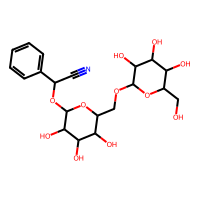
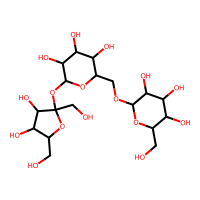
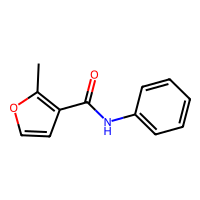
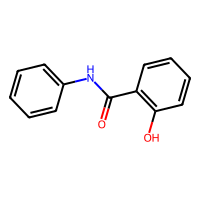
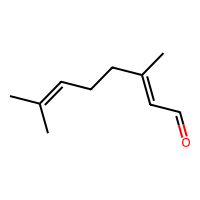
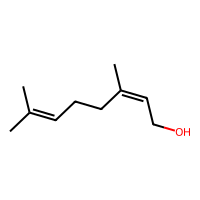
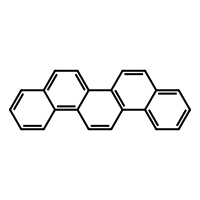
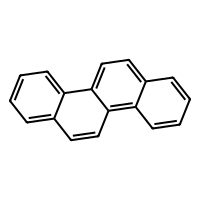
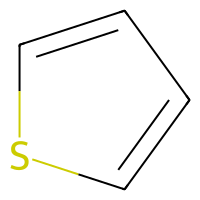
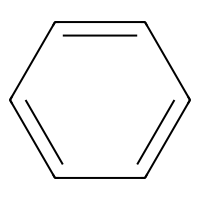
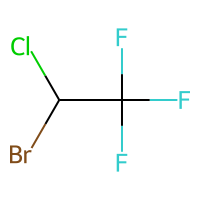
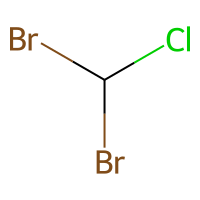
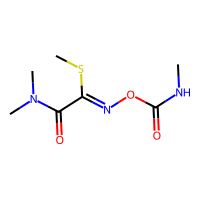
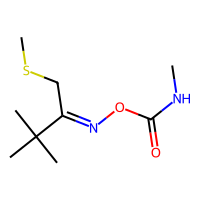
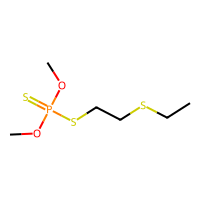
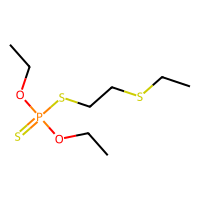
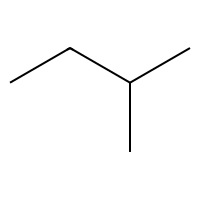
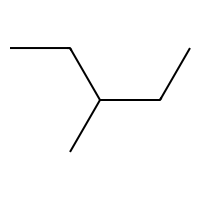
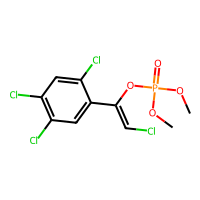
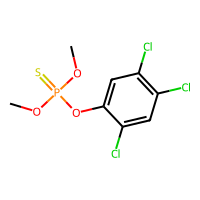

In [62]:
smiles_df